# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [8]:
!pip install kaggle

In [9]:
import os
import shutil

!mkdir -p ~/.kaggle

shutil.copy("kaggle.json", "/root/.kaggle/")

!chmod 600 /root/.kaggle/kaggle.json

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!kaggle datasets download -d resulcaliskan/diamonds

Dataset URL: https://www.kaggle.com/datasets/resulcaliskan/diamonds
License(s): copyright-authors


In [12]:
df = pd.read_csv("diamonds.zip")

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [14]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Data Cleaning and Preparation

## Checking NaN

In [16]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0
price,0


In [17]:
df.shape

(53940, 10)

## Removing Duplicates

In [18]:
df.drop_duplicates(inplace=True)
df.shape

(53794, 10)

## Removing Outliers (IQR Technique)

In [19]:
def remove_outliers_iqr(data, threshold=1.5):
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        return data[(data >= lower_bound) & (data <= upper_bound)]

for col in df.select_dtypes(include=np.number).columns:
    df[col] = remove_outliers_iqr(df[col])
df.dropna(inplace=True)
df.shape

(47416, 10)

# Prprocessing

## Splitting Into X and y

In [20]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [21]:
X

array([[0.23, 'Ideal', 'E', ..., 3.95, 3.98, 2.43],
       [0.21, 'Premium', 'E', ..., 3.89, 3.84, 2.31],
       [0.29, 'Premium', 'I', ..., 4.2, 4.23, 2.63],
       ...,
       [0.7, 'Very Good', 'D', ..., 5.66, 5.68, 3.56],
       [0.86, 'Premium', 'H', ..., 6.15, 6.12, 3.74],
       [0.75, 'Ideal', 'D', ..., 5.83, 5.87, 3.64]], dtype=object)

In [22]:
y

array([ 326.,  326.,  334., ..., 2757., 2757., 2757.])

## One Hot Encoder

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
X

array([[0.0, 0.0, 1.0, ..., 3.95, 3.98, 2.43],
       [0.0, 0.0, 0.0, ..., 3.89, 3.84, 2.31],
       [0.0, 0.0, 0.0, ..., 4.2, 4.23, 2.63],
       ...,
       [0.0, 0.0, 0.0, ..., 5.66, 5.68, 3.56],
       [0.0, 0.0, 0.0, ..., 6.15, 6.12, 3.74],
       [0.0, 0.0, 1.0, ..., 5.83, 5.87, 3.64]], dtype=object)

## Train, Test, Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Modeling

## Build A Model

In [26]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predict

In [27]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
result = pd.DataFrame ({
    "Real":y_test,
    "Pred":np.concatenate((y_pred.reshape(len(y_pred),1)))
})
result.head()

,Real,Pred
0,4497.0,4513.312003
1,4260.0,4406.514467
2,853.0,1227.849880
3,2717.0,2095.397673
4,10032.0,9485.544470


## Checking Accuracy

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

print("Results:\n---------")
print(f"Intercept: {regressor.intercept_}")
print(f"Coef: {regressor.coef_}")
print(f"Mean Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"\nR^2 Score: {r2_score(y_test, y_pred)}")

Results:
---------
Intercept: -2751.317011985149
Coef: [ -286.98   -30.19   155.05   114.6     47.53   635.49   460.     419.73
   274.56   -97.76  -512.8  -1179.23 -2623.13  1039.12  -155.47  -920.6
   571.53   300.85   886.44   901.26 11201.13    96.76   -24.01  -804.28
  1296.96 -2870.81]
Mean Error: 751.743909061813

R^2 Score: 0.9243003557442186


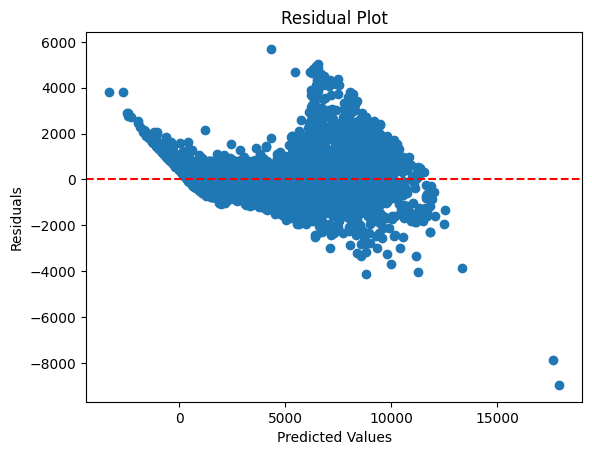

Residual Plot Analysis:
- Look for patterns (curves, funnels, etc.).
- Random scatter suggests a good fit.
- Systematic patterns suggest underfitting.
- Non-random patterns suggest overfitting.
- Look for constant variance (spread of residuals).
- Varying spread suggests heteroscedasticity (may indicate issues).
- Outliers detected (residuals > 3 standard deviations).
- Outliers may indicate data issues or model issues.
- Check for large residuals at extreme predicted values (may indicate overfitting).


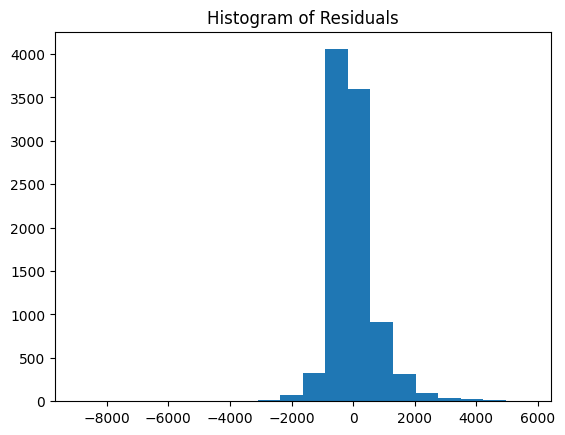

- Check for normal distribution in histogram.


In [29]:
import matplotlib.pyplot as plt
import numpy as np

def check_fit_from_residuals(y_test, y_pred):
    """
    Generates a residual plot and provides basic overfit/underfit analysis.

    Args:
        y_test: Actual target values.
        y_pred: Predicted target values.
    """

    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()


    print("Residual Plot Analysis:")


    print("- Look for patterns (curves, funnels, etc.).")
    print("- Random scatter suggests a good fit.")
    print("- Systematic patterns suggest underfitting.")
    print("- Non-random patterns suggest overfitting.")

    print("- Look for constant variance (spread of residuals).")
    print("- Varying spread suggests heteroscedasticity (may indicate issues).")


    outliers = np.abs(residuals) > 3 * np.std(residuals) #check for residuals more than 3 standard deviations away.
    if np.any(outliers):
        print("- Outliers detected (residuals > 3 standard deviations).")
        print("- Outliers may indicate data issues or model issues.")


    print("- Check for large residuals at extreme predicted values (may indicate overfitting).")

    plt.hist(residuals, bins=20)
    plt.title("Histogram of Residuals")
    plt.show()

    print("- Check for normal distribution in histogram.")


check_fit_from_residuals(y_test, y_pred)

In [30]:
from sklearn.model_selection import cross_val_score

cv_scores_mse = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores_mse)
cv_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
cv_mae = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_medae = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_median_absolute_error')

print("Cross-Validation Results:")
print(f"Mean MSE: {-cv_scores_mse.mean():.4f}")
print(f"Mean RMSE: {cv_rmse.mean():.4f}")
print(f"Mean R^2: {cv_r2.mean():.4f}")
print(f"Mean MAE: {-cv_mae.mean():.4f}")
print(f"Mean Median AE: {-cv_medae.mean():.4f}")


print("\nScores per Fold:")
for i in range(5):
    print(f"  Fold {i+1}: MSE={-cv_scores_mse[i]:.4f}, RMSE={cv_rmse[i]:.4f}, R^2={cv_r2[i]:.4f}")


Cross-Validation Results:
Mean MSE: 553229.2683
Mean RMSE: 743.6669
Mean R^2: 0.9272
Mean MAE: 510.9266
Mean Median AE: 373.3852

Scores per Fold:
  Fold 1: MSE=534010.9880, RMSE=730.7606, R^2=0.9296
  Fold 2: MSE=590198.3396, RMSE=768.2437, R^2=0.9240
  Fold 3: MSE=537832.6839, RMSE=733.3708, R^2=0.9292
  Fold 4: MSE=543505.6031, RMSE=737.2283, R^2=0.9278
  Fold 5: MSE=560598.7268, RMSE=748.7314, R^2=0.9253


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

polynomial_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [32]:
y_pred = polynomial_regression.predict(X_test)
np.set_printoptions(precision=2)
result = pd.DataFrame ({
    "Real":y_test,
    "Pred":np.concatenate((y_pred.reshape(len(y_pred),1)))
})
result.head()

,Real,Pred
0,4497.0,4137.491523
1,4260.0,4076.631049
2,853.0,671.242800
3,2717.0,2723.961472
4,10032.0,9756.811116


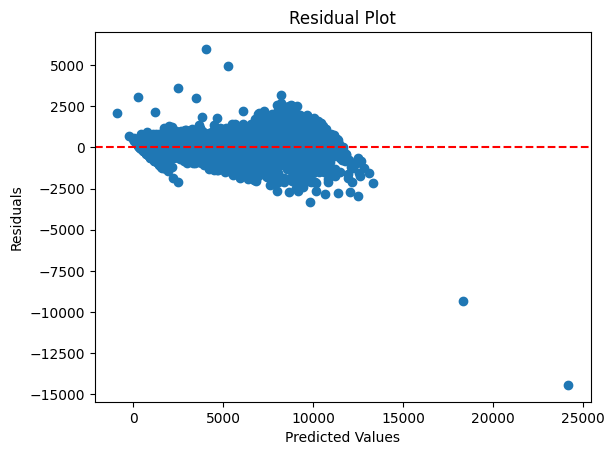

Residual Plot Analysis:
- Look for patterns (curves, funnels, etc.).
- Random scatter suggests a good fit.
- Systematic patterns suggest underfitting.
- Non-random patterns suggest overfitting.
- Look for constant variance (spread of residuals).
- Varying spread suggests heteroscedasticity (may indicate issues).
- Outliers detected (residuals > 3 standard deviations).
- Outliers may indicate data issues or model issues.
- Check for large residuals at extreme predicted values (may indicate overfitting).


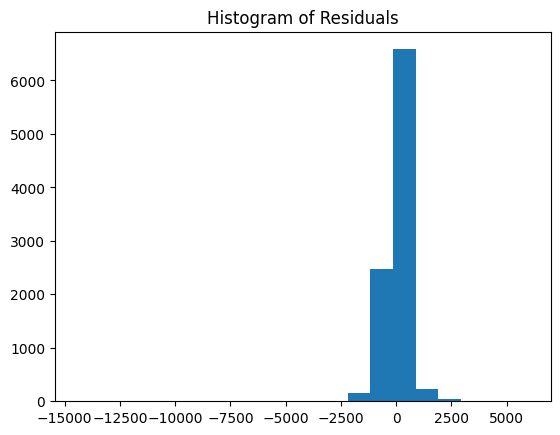

- Check for normal distribution in histogram.


In [33]:
import matplotlib.pyplot as plt
import numpy as np

def check_fit_from_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()


    print("Residual Plot Analysis:")


    print("- Look for patterns (curves, funnels, etc.).")
    print("- Random scatter suggests a good fit.")
    print("- Systematic patterns suggest underfitting.")
    print("- Non-random patterns suggest overfitting.")

    print("- Look for constant variance (spread of residuals).")
    print("- Varying spread suggests heteroscedasticity (may indicate issues).")


    outliers = np.abs(residuals) > 3 * np.std(residuals) #check for residuals more than 3 standard deviations away.
    if np.any(outliers):
        print("- Outliers detected (residuals > 3 standard deviations).")
        print("- Outliers may indicate data issues or model issues.")


    print("- Check for large residuals at extreme predicted values (may indicate overfitting).")

    plt.hist(residuals, bins=20)
    plt.title("Histogram of Residuals")
    plt.show()

    print("- Check for normal distribution in histogram.")


check_fit_from_residuals(y_test, y_pred)

In [34]:
from sklearn.model_selection import cross_val_score

cv_scores_mse = cross_val_score(polynomial_regression, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores_mse)
cv_r2 = cross_val_score(polynomial_regression, X_train, y_train, cv=5, scoring='r2')
cv_mae = cross_val_score(polynomial_regression, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_medae = cross_val_score(polynomial_regression, X_train, y_train, cv=5, scoring='neg_median_absolute_error')

print("Cross-Validation Results:")
print(f"Mean MSE: {-cv_scores_mse.mean():.4f}")
print(f"Mean RMSE: {cv_rmse.mean():.4f}")
print(f"Mean R^2: {cv_r2.mean():.4f}")
print(f"Mean MAE: {-cv_mae.mean():.4f}")
print(f"Mean Median AE: {-cv_medae.mean():.4f}")


print("\nScores per Fold:")
for i in range(5):
    print(f"  Fold {i+1}: MSE={-cv_scores_mse[i]:.4f}, RMSE={cv_rmse[i]:.4f}, R^2={cv_r2[i]:.4f}")


Cross-Validation Results:
Mean MSE: 206866.0810
Mean RMSE: 454.5951
Mean R^2: 0.9728
Mean MAE: 287.4395
Mean Median AE: 172.6605

Scores per Fold:
  Fold 1: MSE=188487.7200, RMSE=434.1517, R^2=0.9751
  Fold 2: MSE=229221.2688, RMSE=478.7706, R^2=0.9705
  Fold 3: MSE=208585.5653, RMSE=456.7117, R^2=0.9725
  Fold 4: MSE=200957.2400, RMSE=448.2825, R^2=0.9733
  Fold 5: MSE=207078.6110, RMSE=455.0589, R^2=0.9724
